## 1D Simulation

In [1]:
import numpy as np
import timeit
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

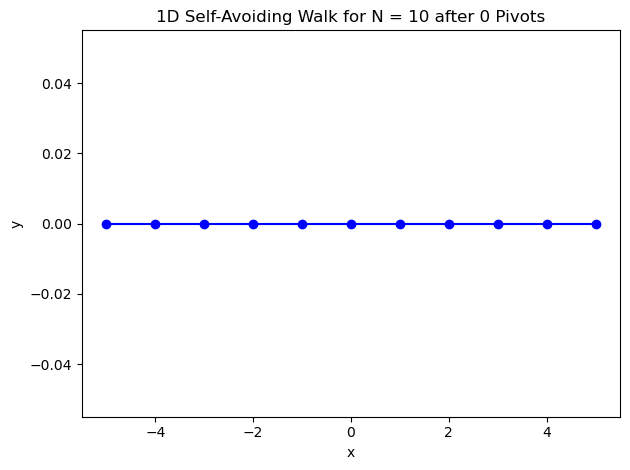

In [20]:
# Define a dot product function used for the rotate operation
def v_dot(a):
    return lambda b: np.dot(a, b)

class LatticeSAW1D:
    def __init__(self, N, l0):
        self.N = N
        self.l0 = l0
        # Initial configuration: a straight line in 1D
        self.init_state = np.arange(N + 1)
        self.state = self.init_state.copy()

    # Define pivot algorithm process where t is the number of successful steps
    def walk(self, t):
        acpt = 0
        # While loop until the number of successful steps reaches t
        while acpt < t:
            pick_pivot = np.random.randint(1, self.N - 1)  # Pick a pivot site
            old_chain = self.state[:pick_pivot+1]
            temp_chain = self.state[pick_pivot+1:]
            # Reflect the part of the walk after the pivot point (1D transformation)
            new_chain = 2 * self.state[pick_pivot] - temp_chain

            # Check for overlaps
            overlap = cdist(new_chain[:, np.newaxis], old_chain[:, np.newaxis])
            overlap = overlap.flatten()

            # Determine whether the new state is accepted or rejected
            if len(np.nonzero(overlap)[0]) != len(overlap):
                continue
            else:
                self.state = np.concatenate((old_chain, new_chain), axis=0)
                acpt += 1
        
        # Center the chain
        self.state = self.l0 * (self.state - np.int_(np.mean(self.state)))

# Parameters
N = 10  # Number of monomers (number of steps)
l0 = 1   # Bond length (step length)
t = 0  # Number of pivot steps to perform

# Create an instance of the LatticeSAW1D class
chain = LatticeSAW1D(N, l0)
# Perform the walk
chain.walk(t)

# Plot the walk after 10 pivots
plt.plot(chain.state, np.zeros_like(chain.state), 'bo-')
plt.title(f'1D Self-Avoiding Walk for N = {N} after {t} Pivots')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

## 2D

0
100
200
300
300
300
300
300
400
500
600
600
600
600
600
600
700
700
800
800
800
900
900
900
900


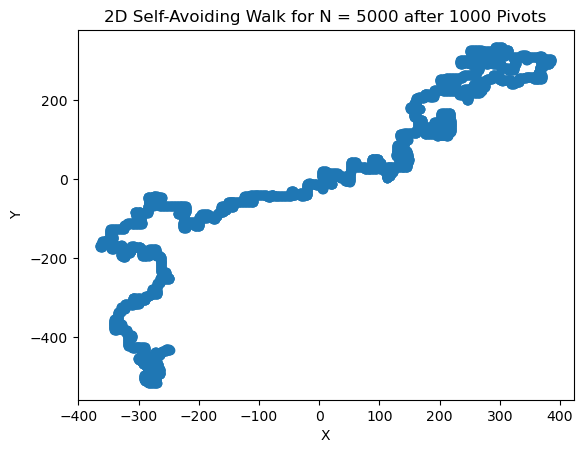

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Define a dot product function used for the rotate operation
def v_dot(a):
    return lambda b: np.dot(a, b)

class LatticeSAW2D:
    def __init__(self, N, l0):
        self.N = N
        self.l0 = l0
        # Initial configuration: a straight line in 2D
        self.init_state = np.stack((np.arange(N+1), np.zeros(N+1)), axis=-1)
        self.state = self.init_state.copy()

        # Integer rotation matrices for 90, 180, and 270 degree rotations
        self.rotate_matrix = np.array([
            [[0, -1], [1, 0]],   # 90 degrees
            [[-1, 0], [0, -1]],  # 180 degrees
            [[0, 1], [-1, 0]]    # 270 degrees
        ])
        
    # Define pivot algorithm process where t is the number of successful steps
    def walk(self, t):

        acpt = 0
        # While loop until the number of successful steps reaches t
        # while acpt < t:
        #     if acpt % 100 == 0:
        #         print(acpt)
            pick_pivot = np.random.randint(1, self.N)  # Pick a pivot site
            pick_side = np.random.choice([-1, 1])  # Pick a side
            
            if pick_side == 1:
                old_chain = self.state[:pick_pivot + 1]
                temp_chain = self.state[pick_pivot + 1:]
            else:
                old_chain = self.state[pick_pivot:]
                temp_chain = self.state[:pick_pivot]
            
            # Pick a symmetry operator
            symtry_oprtr = self.rotate_matrix[np.random.randint(len(self.rotate_matrix))]
            # New chain after symmetry operator
            new_chain = np.apply_along_axis(v_dot(symtry_oprtr), 1, temp_chain - self.state[pick_pivot]) + self.state[pick_pivot]

            # Ensure the new chain has integer values
            new_chain = np.rint(new_chain).astype(int)

            # Use cdist function of scipy package to calculate the pair-pair distance between old_chain and new_chain
            overlap = cdist(new_chain, old_chain)
            overlap = overlap.flatten()
            
            # Determine whether the new state is accepted or rejected
            if len(np.nonzero(overlap)[0]) != len(overlap):
                continue  # Reject the move if overlapping
            else:
                if pick_side == 1:
                    self.state = np.concatenate((old_chain, new_chain), axis=0)
                elif pick_side == -1:
                    self.state = np.concatenate((new_chain, old_chain), axis=0)
                acpt += 1
        
        # Center the chain at the origin using integer arithmetic
        center_of_mass = np.mean(self.state, axis=0).astype(int)
        self.state = self.state - center_of_mass

# Parameters
N = 5000  # Number of monomers (number of steps)
l0 = 1  # Bond length (step length)
t = 1000  # Number of pivot steps to perform

# Create an instance of the LatticeSAW2D class
chain = LatticeSAW2D(N, l0)
# Perform the walk
chain.walk(t)

# Plot the walk after t pivots
plt.plot(chain.state[:, 0], chain.state[:, 1], 'o-')
plt.title(f'2D Self-Avoiding Walk for N = {N} after {t} Pivots')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

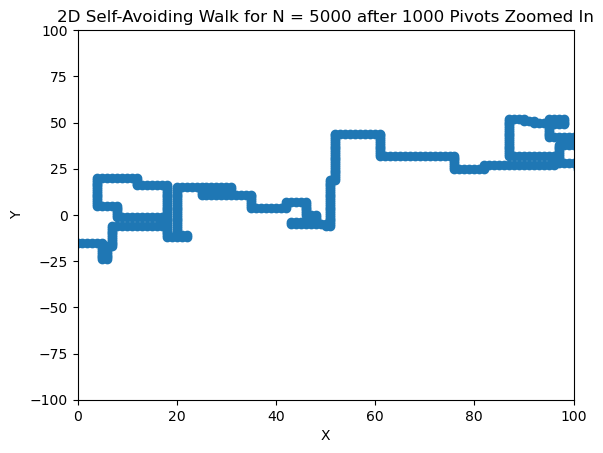

In [16]:
#now plot the same plot as above but zoom in between 200 and 400 on the x axis and 150 and 150 on the y axis
# Plot the walk after t pivots
plt.plot(chain.state[:, 0], chain.state[:, 1], 'o-')
plt.title(f'2D Self-Avoiding Walk for N = {N} after {t} Pivots Zoomed In')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()

## 3D test

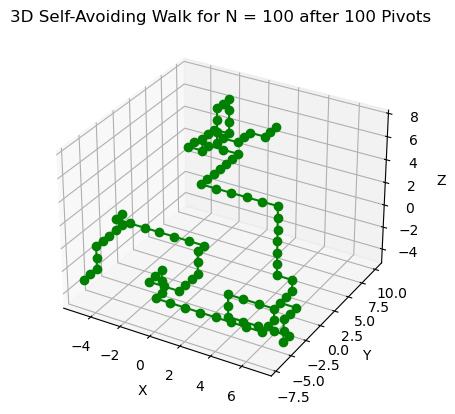

In [34]:
import numpy as np
import timeit
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# define a dot product function used for the rotate operation
def v_dot(a):
    return lambda b: np.dot(a, b)

class lattice_SAW:
    def __init__(self, N, l0):
        self.N = N
        self.l0 = l0
        # initial configuration. Usually, we just use a straight chain as initial configuration
        self.init_state = np.dstack((np.arange(N), np.zeros(N), np.zeros(N)))[0]
        self.state = self.init_state.copy()
        
        # Define a rotation matrix
        # 9 possible rotations: 3 axes * 3 possible rotation angles (90, 180, 270)
        self.rotate_matrix = np.array([
            [[1,0,0], [0,0,-1], [0,1,0]], [[1,0,0], [0,-1,0], [0,0,-1]], [[1,0,0], [0,0,1], [0,-1,0]],
            [[0,0,1], [0,1,0], [-1,0,0]], [[-1,0,0], [0,1,0], [0,0,-1]], [[0,0,-1], [0,1,0], [-1,0,0]],
            [[0,-1,0], [1,0,0], [0,0,1]], [[-1,0,0], [0,-1,0], [0,0,1]], [[0,1,0], [-1,0,0], [0,0,1]]
        ])
        
    # Define pivot algorithm process where t is the number of successful steps
    def walk(self, t):
        acpt = 0
        # While loop until the number of successful steps reaches t
        while acpt < t:
            pick_pivot = np.random.randint(1, self.N - 1)  # Pick a pivot site
            pick_side = np.random.choice([-1, 1])  # Pick a side
            
            if pick_side == 1:
                old_chain = self.state[0:pick_pivot + 1]
                temp_chain = self.state[pick_pivot + 1:]
            else:
                old_chain = self.state[pick_pivot:]
                temp_chain = self.state[0:pick_pivot]
            
            # Pick a symmetry operator
            symtry_oprtr = self.rotate_matrix[np.random.randint(len(self.rotate_matrix))]
            # New chain after symmetry operator
            new_chain = np.apply_along_axis(v_dot(symtry_oprtr), 1, temp_chain - self.state[pick_pivot]) + self.state[pick_pivot]

            # Use cdist function of scipy package to calculate the pair-pair distance between old_chain and new_chain
            overlap = cdist(new_chain, old_chain)
            overlap = overlap.flatten()
            
            # Determine whether the new state is accepted or rejected
            if len(np.nonzero(overlap)[0]) != len(overlap):
                continue
            else:
                if pick_side == 1:
                    self.state = np.concatenate((old_chain, new_chain), axis=0)
                elif pick_side == -1:
                    self.state = np.concatenate((new_chain, old_chain), axis=0)
                acpt += 1
        
        # Place the center of mass of the chain on the origin
        self.state = self.l0 * (self.state - np.int_(np.mean(self.state, axis=0)))

# Parameters
N = 100  # Number of monomers (number of steps)
l0 = 1   # Bond length (step length)
t = 100   # Number of pivot steps to perform

# Create an instance of the lattice_SAW class
chain = lattice_SAW(N, l0)
# Perform the walk
chain.walk(t)

# Plot the walk after t pivots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(chain.state[:, 0], chain.state[:, 1], chain.state[:, 2], 'go-')
ax.set_title(f'3D Self-Avoiding Walk for N = {N} after {t} Pivots')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# 4D

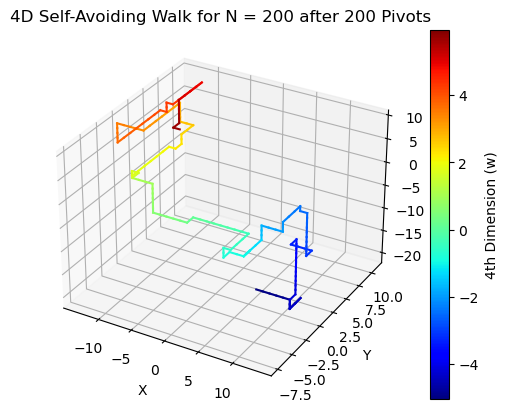

In [ ]:
import numpy as np
import timeit
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a dot product function used for the rotation operation
def v_dot(a):
    return lambda b: np.dot(a, b)

class LatticeSAW4D:
    def __init__(self, N, l0):
        self.N = N
        self.l0 = l0
        # Initial configuration: a straight line in 4D
        self.init_state = np.dstack((np.arange(N), np.zeros(N), np.zeros(N), np.zeros(N)))[0]
        self.state = self.init_state.copy()
        
          # Define 4D rotation matrices for 90°, 180°, and 270° rotations
        self.rotation_matrices = [
            # 90° rotations
            np.array([[0, -1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]),  # xy-plane 90°
            np.array([[0, 0, -1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1]]),  # xz-plane 90°
            np.array([[0, 0, 0, -1], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]]),  # xw-plane 90°
            np.array([[1, 0, 0, 0], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]]),  # yz-plane 90°
            np.array([[1, 0, 0, 0], [0, 0, 0, -1], [0, 0, 1, 0], [0, 1, 0, 0]]),  # yw-plane 90°
            np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1], [0, 0, 1, 0]]),  # zw-plane 90°

            # 180° rotations
            np.array([[-1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]),  # xy-plane 180°
            np.array([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]),  # xz-plane 180°
            np.array([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]),  # xw-plane 180°
            np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]),  # yz-plane 180°
            np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]),  # yw-plane 180°
            np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]]),  # zw-plane 180°

            # 270° rotations
            np.array([[0, 1, 0, 0], [-1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]),  # xy-plane 270°
            np.array([[0, 0, 1, 0], [0, 1, 0, 0], [-1, 0, 0, 0], [0, 0, 0, 1]]),  # xz-plane 270°
            np.array([[0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [-1, 0, 0, 0]]),  # xw-plane 270°
            np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, -1, 0, 0], [0, 0, 0, 1]]),  # yz-plane 270°
            np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0]]),  # yw-plane 270°
            np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, -1, 0]])   # zw-plane 270°
        ]
        
    # Define pivot algorithm process where t is the number of successful steps
    def walk(self, t):
        acpt = 0
        # While loop until the number of successful steps reaches t
        while acpt < t:
            pick_pivot = np.random.randint(1, self.N - 1)  # Pick a pivot site
            pick_side = np.random.choice([-1, 1])  # Pick a side
            
            if pick_side == 1:
                old_chain = self.state[0:pick_pivot + 1]
                temp_chain = self.state[pick_pivot + 1:]
            else:
                old_chain = self.state[pick_pivot:]
                temp_chain = self.state[0:pick_pivot]
            
            # Pick a rotation matrix
            rotation_matrix = self.rotation_matrices[np.random.randint(len(self.rotation_matrices))]
            # New chain after rotation
            new_chain = np.apply_along_axis(v_dot(rotation_matrix), 1, temp_chain - self.state[pick_pivot]) + self.state[pick_pivot]

            # Use cdist function of scipy package to calculate the pair-pair distance between old_chain and new_chain
            overlap = cdist(new_chain, old_chain)
            overlap = overlap.flatten()
            
            # Determine whether the new state is accepted or rejected
            if len(np.nonzero(overlap)[0]) != len(overlap):
                continue
            else:
                if pick_side == 1:
                    self.state = np.concatenate((old_chain, new_chain), axis=0)
                elif pick_side == -1:
                    self.state = np.concatenate((new_chain, old_chain), axis=0)
                acpt += 1
        
        # Place the center of mass of the chain on the origin
        self.state = self.l0 * (self.state - np.mean(self.state, axis=0))

# Parameters
N = 200  # Number of monomers (number of steps)
l0 = 1   # Bond length (step length)
t = 200   # Number of pivot steps to perform

# Create an instance of the LatticeSAW4D class
chain = LatticeSAW4D(N, l0)
# Perform the walk
chain.walk(t)

# Plot the 4D walk after t pivots (projected to 3D for visualization)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.jet(np.linspace(0, 1, N+1))  # Use a color map to represent the w dimension

for i in range(N):
    ax.plot(chain.state[i:i+2, 0], chain.state[i:i+2, 1], chain.state[i:i+2, 2], color=colors[i])

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=np.min(chain.state[:, 3]), vmax=np.max(chain.state[:, 3])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('4th Dimension (w)')

ax.set_title(f'4D Self-Avoiding Walk for N = {N} after {t} Pivots')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()